# Introduction to Logistic Regression (Statistic Modeling/Machine Learning)

### Please note: This lecture will not be recorded and made available for viewing online. If you do not wish to be recorded then this is good, you do not need to adjust your camera settings accordingly. 

Sources : <br> 
screen shots, basic concept, and R^2 - https://www.youtube.com/watch?v=xxFYro8QuXA&t=422s&ab_channel=StatQuestwithJoshStarmer <br>
python methods - https://www.youtube.com/watch?v=zM4VZR0px8E&ab_channel=codebasics <br>
height weight csv - https://www.kaggle.com/sonalisingh1411/linear-regression-using-weight-height/comments,<br> 
insurance csv - https://www.youtube.com/watch?v=zM4VZR0px8E&ab_channel=codebasics, <br> 
hr csv - https://www.kaggle.com/giripujar/hr-analytics <br>
Pretty table: https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8 <br> 

*Logistical regression* is a technique used to solved classification problems by predicting whether something is true or false instead of a continuous value. For example, it can be used to determine whether someone is obese or not obese as in the figure below. Here we have a *Binary Classification* where there are only two categories, is Obese and not Obese. However, a classification can involve multiple categories aptly named *Multiclass Classification*. You can think of this as a model predicting whether someone will vote democratic, republican, or independent as a *Multiclass Classification* where there are 3 categories. 

![](StatQuestLogReg.png)

# Quick review of Linear Regression

A good place to start is to review Linear Regression and all the different analysis tools. Recall that in Linear regression we fit a linear equation on a model of the relationship between two variables and used this line to make predictions on our data set. For example, we can relate weight to height using a linear regression model and us it to predict someone's height based on their weight. Our fitted line would take the form.
$$
height=\beta_0+\beta_1weight
$$
Where $\beta_0$ is our y-intercept and $\beta_1$ is our coefficient. To find the *best* choice of $\beta_0,\beta_1$ that *minimizes* the squared error on our data set, we build a linear regression model on our data. Using ordinary least squares regression we calculate the best-fitting line by minimizing the error from the sum of the squares from each data point. Below is the picture from lecture that helps to make this concept *click*


The total comparison to "predicted" vs "reality" gives an "error" for our model:

![](lr3.png)

## What we can do with Linear regression

Now lets look at what is possible through linear regression and take a look at the simple linear regression of a single explanatory variable. This weight-height.csv was downloaded from Kaggle at https://www.kaggle.com/sonalisingh1411/linear-regression-using-weight-height. 

In [1]:
#Imports
import pandas as pd #working with csv file
import matplotlib.pyplot as plt #ploting model
from sklearn.model_selection import train_test_split 

In [2]:
data=pd.read_csv("weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
#explanatory variables
X=data.iloc[:,1:2].values

#dependent variables
Y=data.iloc[:,2].values

#Split data into training testing sets. test set on 20% and train on 80% of data
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [9]:
#build model
from sklearn.linear_model import LinearRegression
ols=LinearRegression()
ols.fit(X_train,y_train)#train model so we can make predictions

LinearRegression()

We can calculate square correlation $R^2$ that measures the variance in the dependent variable caused by the independent variable. This value is always between 0 and 1 inclusive and the closer to 1 the better the fit.

In [10]:
print("Variance: ",ols.score(X_test,y_test))

Variance:  0.852493337596542


We can also calculate the $p-value$ to determine if $R^2$ is statistically significant. In the table below we can see that the $p-value$ reads $0.000$. Although it most likely not exactly zero, it still suggests a strong correlation between the two variables. 

In [11]:
#make a pretty regression table
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        03:24:06   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -350.7372      2.111   -166.109      0.0

In [12]:
print("Coefficients: ",ols.coef_)
print("Y-intercept: ",ols.intercept_)

Coefficients:  [7.7101523]
Y-intercept:  -350.3293696067008


Lastly, we can use our model to predict $height$ given a $weight$. This is a basic technique in machine learning!

In [14]:
X_test

array([[66.59513683],
       [64.71899885],
       [71.47138723],
       ...,
       [64.81942365],
       [63.82509328],
       [64.9739192 ]])

In [13]:
ols.predict(X_test)

array([163.12927764, 148.66396807, 200.7259109 , ..., 149.43825861,
       141.77181998, 150.62944277])

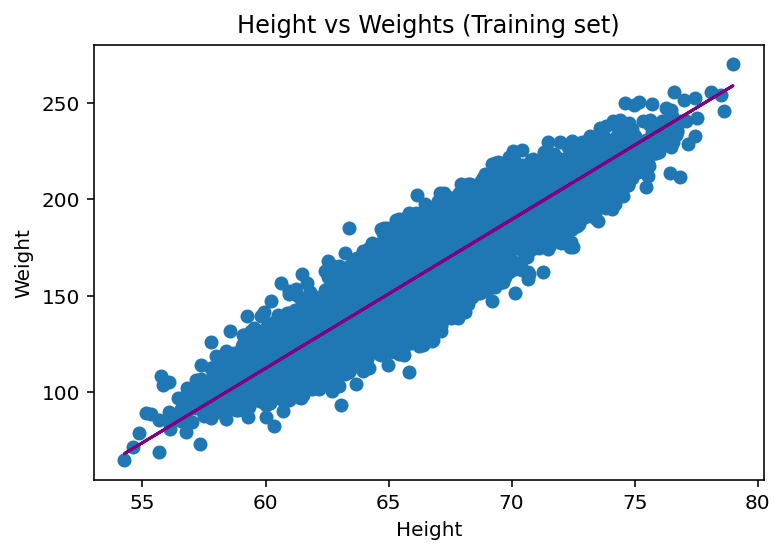

In [58]:
#display Training set with linear regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, ols.predict(X_train),color='purple')
plt.title('Height vs Weights (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

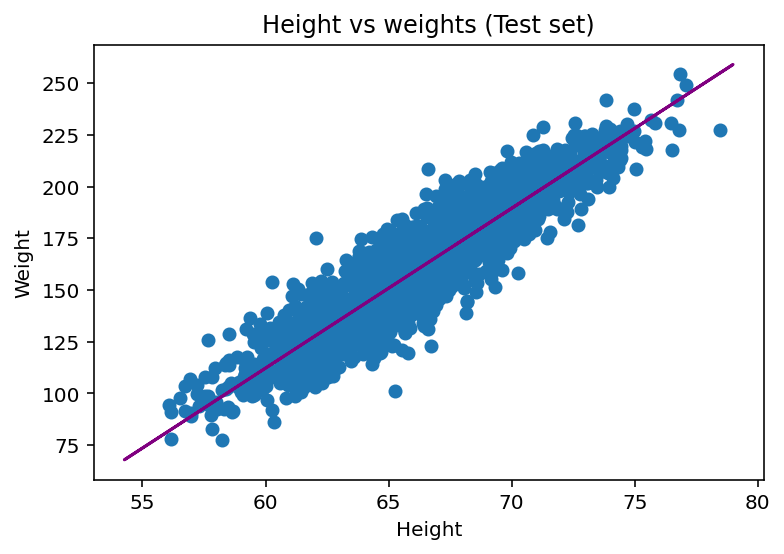

In [59]:
#display Testing set with linear regression line
plt.scatter(X_test, y_test,)
plt.plot(X_train, ols.predict(X_train), color = 'purple')
plt.title('Height vs weights (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# Finally lets look logistical regression
Now that we have reviewed all of the cool things we can do with linear regression, lets lets build a simple regression model for a *Binary Classification* problem. We will be making a logistical regression model that predicts if a customer will by life insurance based on their age.

In [4]:
#Imports
import pandas as pd #working with csv file
import matplotlib.pyplot as plt #ploting model
from sklearn.model_selection import train_test_split 
import seaborn as sns
%matplotlib inline
import os

In [5]:
df=pd.read_csv("insurance.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Text(0.5, 1.0, 'Age vs Bought Insurance')

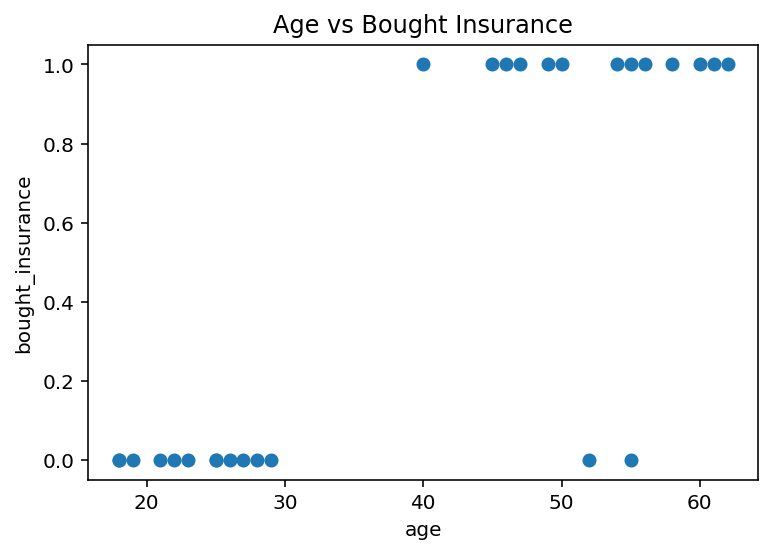

In [6]:
#plot data from csv file and display
x = df.age
y = df.bought_insurance
plt.scatter(x,y)
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.title('Age vs Bought Insurance')

# *****************Participation Check *******************
Question: Looking at the graph above, what is a good predictor of if someone will buy life insurance or not?

Answer: Age

# ***********************************************

We can calculate the average of those who bought the insurance based on their age and we can see as that the average person under 40 did not purchase the insurance. Thus we can conclude the Age is a good predictor for a customer making a the purchase.

In [41]:
df.groupby('age').mean()

,bought_insurance
age,
18,0.0
19,0.0
21,0.0
22,0.0
23,0.0
25,0.0
26,0.0
27,0.0
28,0.0


Lets separate our data into training and testing sets just like we did with our linear regression model. 

In [26]:
#explanatory variables
X=df[['age']]

#dependent variables
Y=df.bought_insurance

#same 20% 80% split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8)

In [27]:
#import logistic regression method
from sklearn.linear_model import LogisticRegression

reg=LogisticRegression()

#train model so we can make predictions
reg.fit(X_train,y_train)

LogisticRegression()

# Sigmoid activation and Probabilities
In logistical regression we don't fit a linear equation on our model like in linear regression. Instead we make predictions by fitting a *S* shaped curve with a the *Sigmoid Function*. 
$$
S(z) = \frac{1} {1 + e^{-z}}
$$
Where $e=$ *Euler's number*~$2.71828$ and $z$ is our equation of a line $mx+b$. This function maps our value into a number between 0 and 1 since we are dividing by a number slightly greater than 1 so the ratio is less than 1. So this is where we get that nice S shape fit on our model. Don't worry to much about the details since we will be using libraries to handle this function. You can read more about Sigmoid activation here --> at https://en.wikipedia.org/wiki/Sigmoid_function.

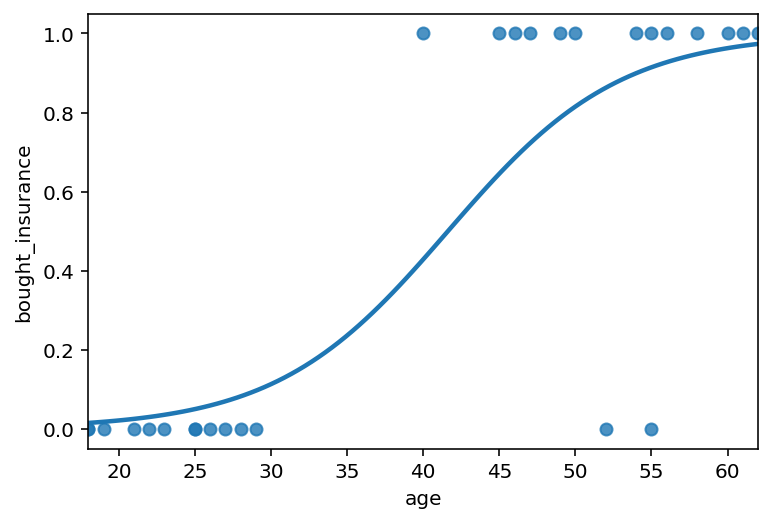

In [19]:
sns.regplot(x="age",y="bought_insurance",data=df,logistic=True,ci=None)
plt.show()

This curve tells us the probability that a customer bought insurance based on their age. Towards to bottom left half of the curve, the probability is very low and the far right is very high. We can read the middle of the graph at age 40 have ~ $50\%$ chance of buying life insurance based on this curve. Now lets see the model in action.

In [34]:
X_test

,age
24,50
1,25
12,27
9,61
10,18
11,28


In [35]:
#call predict method
reg.predict(X_test)

array([1, 0, 0, 1, 0, 0])

As we can see here the model is making predictions on whether or not they will buy the insurance based on the customers age. We can also use python to show you the probability of your data being in one class versus the other. For example...

In [36]:
#call predict probability method
reg.predict_proba(X_test)

array([[0.20567013, 0.79432987],
       [0.92381252, 0.07618748],
       [0.89912945, 0.10087055],
       [0.04549017, 0.95450983],
       [0.97267751, 0.02732249],
       [0.88429302, 0.11570698]])

The first *Class* here is if the customer will not buy insurance and the second *Class* is if they will. So in our prediction array above, customer $24$ who is $50$ years old has a $20\%$ probability of not buying the insurance and about $80\%$ probability of buying it. 

# $R^2$ with logistical regression
Its complicated! We were able to calculate $R^2$ for our linear regression model somewhat easily, but with a logistical regression model there are over 10 different ways of determining these values. So we will focus on a common technique for our model called *Pseudo $R^2$*. This method is similar to how we calculate it in linear regression and we do so by comparing of the sum of squares for the residuals around the best fitting line, denoted by $SS(fit)$,  to the sum of squared residuals around the worst fitting line denoted as $SS(mean)$.
$$
R^2=\frac{SS(mean)-SS(fit)}{SS(mean)}
$$
Recall that the values are between 0 and 1. When the line fits the model perfectly, SS(fit) is zero which results in the fraction reducing to 1. With logistical regression, we compare the over all probability, denoted as $LL(overall probability)$ with the log likely-hood of the fitted line made above with our *Sigmoid function*. Thus the equations is
$$
R^2=\frac{LL(overall probability)-LL(fit)}{LL(overall probability)}
$$

Again python makes this process more manageable so lets find $R^2$.

In [28]:
#call score method 
reg.score(X_test,y_test)

1.0

Great! As probably excepted we have a variance of $1.0$ , thus our line fits the model perfectly.

# Mini- Assignment

#### Excercise 1: 
Below I have created a data frame from the csv file that you will analyze. You new job is the head of the HR department at some company and your task is to predict whether an employee will leave the company or stay working. Start by looking at the data set for any correlation that could aid us in our logistical regression model to make these prediction. 

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


a) A $1$ in the *left* column indicates and employee that stayed and 0 otherwise. Calculate the average of all columns for those that left the company and the average of those that stayed in two separate rows.

In [43]:
#solution
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


b) What do you notice about the *satisfaction_level* for those who stayed with the company versus those who left? Are there any other difference in row values that could be useful to note?

Answer: Those who left the company a lower satisfaction rate that those who stayed. Also, *promotions_last_5Years* are much higher in those who stayed and employees who had a higher *average_monthly_hours* were those who left the company.

c) Create a bar chart using pandas crosstab method that compares employee *salary* to those and stayed and those that left. Also, determine if it is a useful factor in our model. Then create the same type of chart, but compare the *department* column instead to determine if category is useful.

The salaries for those the stayed with the company are significanly higher than those who left. Therefore, this information is useful for our prediction model
Departemnt is not useful for our model


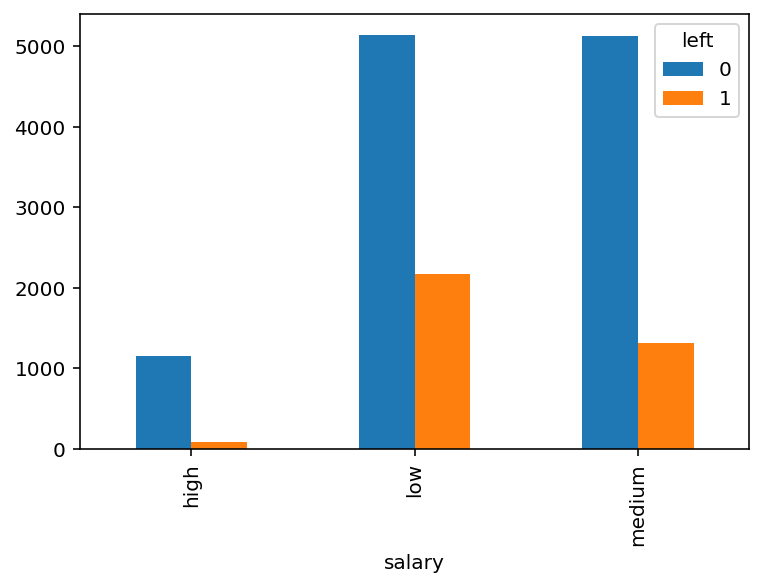

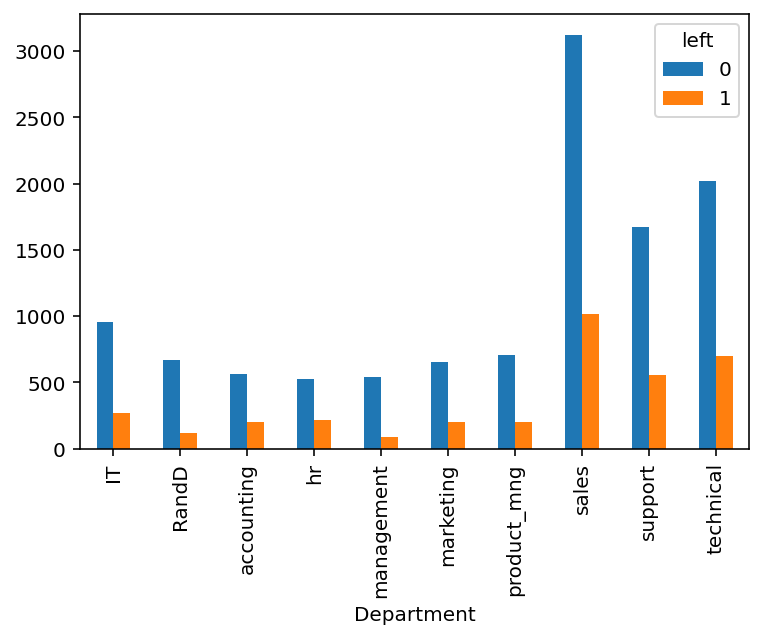

In [48]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
print("The salaries for those the stayed with the company are significanly higher than those who left. Therefore, this information is useful for our prediction model")
pd.crosstab(df.Department,df.left).plot(kind='bar')
print("department is not useful for our model")

#### Excercise 2
Below I have created a new data frame you with relevant data and left out *salary* for simplicity purposes. Create a logistical regression model and use it to make predictions based on the test set as well as calculate the variance in the model.  

In [49]:
newDf=df[['satisfaction_level','average_montly_hours','promotion_last_5years']]
newDf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.38,157,0
1,0.80,262,0
2,0.11,272,0
3,0.72,223,0
4,0.37,159,0


In [54]:
#answer
#explanatory variables
X=newDf

#dependent variables
Y=df.left

#same 20% 80% split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8)

#import logistic regression method
from sklearn.linear_model import LogisticRegression

reg=LogisticRegression()

#train model so we can make predictions
reg.fit(X_train,y_train)

LogisticRegression()

In [55]:
reg.score(X_test,y_test)

0.7786666666666666

In [56]:
reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])